<a href="https://colab.research.google.com/github/michelleruas/Variance_Machine_Learning_Project/blob/master/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Algorithm

In [1]:
#Install libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [12]:
#Load the stock data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [16]:
#Store data
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,305.459991,312.890015,303.239990,310.829987,310.829987,6531700
1,2019-08-13,309.769989,316.429993,308.160004,312.279999,312.279999,5289400
2,2019-08-14,308.010010,308.410004,298.010010,299.109985,299.109985,7355800
3,2019-08-15,299.500000,300.630005,288.000000,295.760010,295.760010,9629200
4,2019-08-16,298.859985,303.549988,296.269989,302.799988,302.799988,6905800
5,2019-08-19,306.250000,311.750000,304.750000,309.380005,309.380005,4942200


In [17]:
#Get the number of trading days
df.shape

(254, 7)

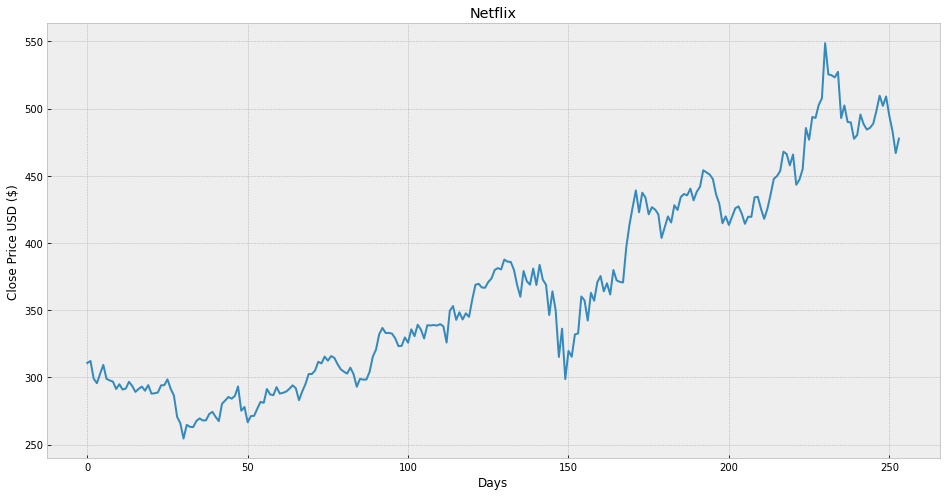

In [20]:
#Visualise the close price data
plt.figure(figsize = (16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [22]:
#Get the close price, create new data frame
df = df[['Close']]
df.head(4)

,Close
0,310.829987
1,312.279999
2,299.109985
3,295.760010


In [26]:
#Create a variable to predict 'x' days into the future
future_days = 25

#Create new column (target) shifted 'x' units / days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
250,494.730011,NaN
251,483.380005,NaN
252,466.929993,NaN
253,477.708405,NaN


In [28]:
#Create the feature data set (x) and convert it to a numpy array and remove the last x rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X

array([[310.829987],
       [312.279999],
       [299.109985],
       [295.76001 ],
       [302.799988],
       [309.380005],
       [298.98999 ],
       [297.809998],
       [296.929993],
       [291.440002],
       [294.980011],
       [291.029999],
       [291.769989],
       [296.779999],
       [293.75    ],
       [289.290009],
       [291.519989],
       [293.25    ],
       [290.170013],
       [294.339996],
       [287.98999 ],
       [288.269989],
       [288.859985],
       [294.149994],
       [294.290009],
       [298.600006],
       [291.559998],
       [286.600006],
       [270.75    ],
       [265.920013],
       [254.589996],
       [264.75    ],
       [263.309998],
       [263.079987],
       [267.619995],
       [269.579987],
       [268.029999],
       [268.149994],
       [272.790009],
       [274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.3

In [30]:
#Create target data set, convert it to a numpy array and get all target values expect x rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[298.600006 291.559998 286.600006 270.75     265.920013 254.589996
 264.75     263.309998 263.079987 267.619995 269.579987 268.029999
 268.149994 272.790009 274.459991 270.720001 267.529999 280.480011
 282.929993 285.529999 284.25     286.279999 293.350006 275.299988
 278.049988 266.690002 271.269989 271.5      276.820007 281.859985
 281.209991 291.450012 287.410004 286.809998 292.859985 288.029999
 288.589996 289.570007 291.570007 294.179993 292.01001  283.109985
 289.619995 295.029999 302.570007 302.600006 305.160004 311.690002
 310.480011 315.549988 312.48999  315.929993 314.660004 309.98999
 306.160004 304.320007 302.859985 307.350006 302.5      293.119995
 298.929993 298.440002 298.5      304.209991 315.480011 320.799988
 332.220001 336.899994 333.100006 333.200012 332.630005 329.089996
 323.309998 323.570007 329.809998 325.899994 335.829987 330.75
 339.26001  335.660004 329.049988 338.920013 338.690002 339.070007
 338.619995 339.670013 338.109985 326.       349.600006 353.160004


In [31]:
#Split the data into 75% trainnig and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [34]:
#Get last x rows from the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[421.970001],
       [414.329987],
       [419.600006],
       [419.48999 ],
       [434.049988],
       [434.480011],
       [425.559998],
       [418.070007],
       [425.5     ],
       [436.130005],
       [447.769989],
       [449.869995],
       [453.720001],
       [468.040009],
       [466.26001 ],
       [457.850006],
       [465.910004],
       [443.399994],
       [447.23999 ],
       [455.040009],
       [485.640015],
       [476.890015],
       [493.809998],
       [493.160004],
       [502.779999]])

In [37]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[507.76001  548.72998  525.5      525.5      425.559998 527.390015
 492.98999  525.5      490.100006 489.820007 477.579987 457.850006
 495.649994 488.51001  484.480011 485.799988 488.880005 498.619995
 509.640015 502.109985 509.079987 494.730011 483.380005 466.929993
 477.708405]

[444.3818405  436.4889108  441.93338898 441.819731   456.86172447
 457.30598299 448.09068108 440.35274075 448.0286969  459.01059854
 471.03591361 473.20543839 477.18289534 491.97695416 490.13802991
 481.44962039 489.77643728 466.5212539  470.48836947 478.546601
 510.15959233 501.11993155 518.60003517 517.92852372 527.86697989]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


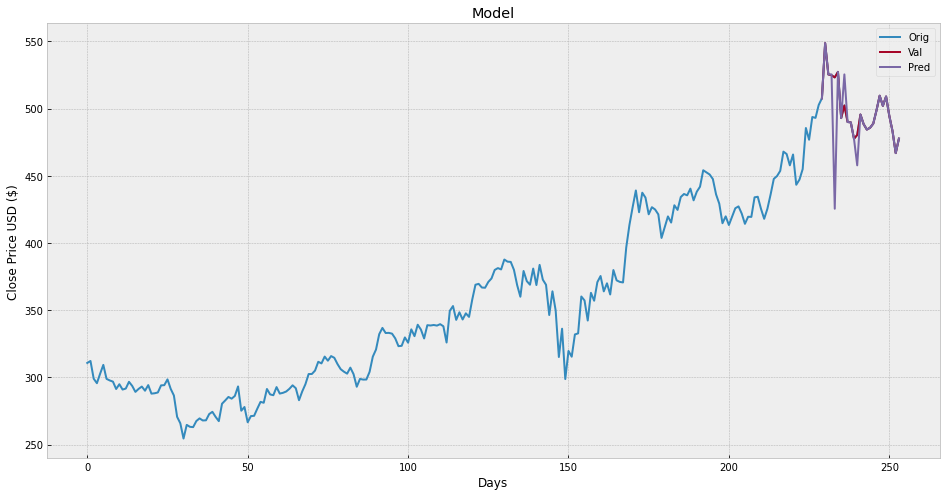

In [41]:
#Visualise the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


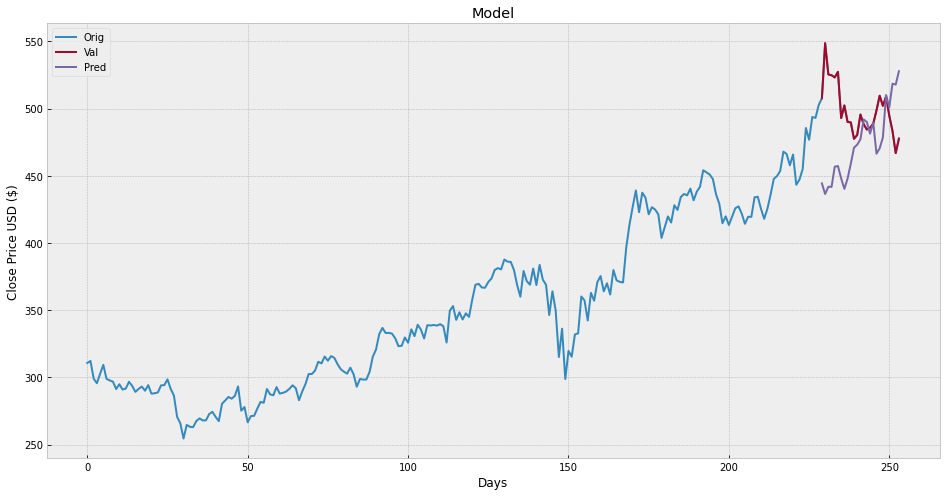

In [42]:
#Visualise the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()